In [3]:
# WORD EMBEDDING
# (ref) https://pytorch.org/tutorials/beginner/nlp/word_embeddings_tutorial.html


import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim

torch.manual_seed(1)

word_to_idx = {"hello":0, "world":1}
embeds = nn.Embedding(2,5) #2 words in vocab, 5dimensions of embeddings
lookup_tensor = torch.tensor([word_to_idx["hello"]], dtype=torch.long)
hello_embed = embeds(lookup_tensor)
print(hello_embed)


tensor([[ 0.6614,  0.2669,  0.0617,  0.6213, -0.4519]],
       grad_fn=<EmbeddingBackward>)


[(['When', 'forty'], 'winters'), (['forty', 'winters'], 'shall'), (['winters', 'shall'], 'besiege')]
['When', 'forty'] ['an'] winters
['forty', 'winters'] ["beauty's"] shall
['winters', 'shall'] ["excuse,'"] besiege
['shall', 'besiege'] ['And'] thy
['besiege', 'thy'] ['and'] brow,
['thy', 'brow,'] ['And'] And
['brow,', 'And'] ['and'] dig
['And', 'dig'] ['thy'] deep
['dig', 'deep'] ['thriftless'] trenches
['deep', 'trenches'] ['when'] in
['trenches', 'in'] ['thy'] thy
['in', 'thy'] ["excuse,'"] beauty's
['thy', "beauty's"] ['thy'] field,
["beauty's", 'field,'] ['And'] Thy
['field,', 'Thy'] ['thy'] youth's
['Thy', "youth's"] ['thy'] proud
["youth's", 'proud'] ["excuse,'"] livery
['proud', 'livery'] ['dig'] so
['livery', 'so'] ['thine!'] gazed
['so', 'gazed'] ['of'] on
['gazed', 'on'] ['thy'] now,
['on', 'now,'] ['How'] Will
['now,', 'Will'] ['thy'] be
['Will', 'be'] ['an'] a
['be', 'a'] ['thy'] totter'd
['a', "totter'd"] ['be'] weed
["totter'd", 'weed'] ['and'] of
['weed', 'of'] ["excuse

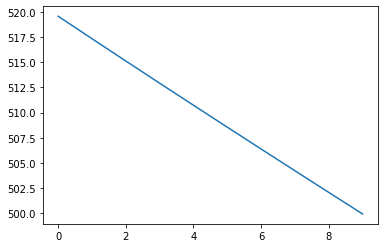

In [19]:
### Example: N-Gram Language Modeling
CONTEXT_SIZE = 2
EMBEDDING_DIM = 10

# Shakespeare Sonnet 2
test_sentence = """When forty winters shall besiege thy brow,
And dig deep trenches in thy beauty's field,
Thy youth's proud livery so gazed on now,
Will be a totter'd weed of small worth held:
Then being asked, where all thy beauty lies,
Where all the treasure of thy lusty days;
To say, within thine own deep sunken eyes,
Were an all-eating shame, and thriftless praise.
How much more praise deserv'd thy beauty's use,
If thou couldst answer 'This fair child of mine
Shall sum my count, and make my old excuse,'
Proving his beauty by succession thine!
This were to be new made when thou art old,
And see thy blood warm when thou feel'st it cold.""".split()

# tokenize 
trigrams = [([test_sentence[i], test_sentence[i+1]], test_sentence[i+2])
            for i in range(len(test_sentence)-2)]
print(trigrams[:3])

vocab = set(test_sentence)
word_to_idx = {word: i for i, word in enumerate(vocab)}

class NGramLangModeler(nn.Module):
    def __init__(self, vocab_size, embedding_dim, context_size):
        super(NGramLangModeler, self).__init__()
        self.embeddings = nn.Embedding(vocab_size, embedding_dim)
        self.linear1 = nn.Linear(context_size*embedding_dim, 128)
        self.linear2 = nn.Linear(128, vocab_size)
        
    def forward(self, inputs):
        embeds = self.embeddings(inputs).view((1,-1))
        out = F.relu(self.linear1(embeds))
        out = self.linear2(out)
        log_probs = F.log_softmax(out, dim=1)
        return log_probs

losses = []
loss_function = nn.NLLLoss()
model = NGramLangModeler(len(vocab), EMBEDDING_DIM, CONTEXT_SIZE)
optimizer = optim.SGD(model.parameters(), lr=0.001)

for epoch in range(10):
    total_loss = 0
    for context, target in trigrams:
        context_idxs = torch.tensor([word_to_idx[w] for w in context], dtype=torch.long)
        model.zero_grad()
        log_probs = model(context_idxs)
        loss = loss_function(log_probs, torch.tensor([word_to_idx[target]], dtype=torch.long))
        loss.backward()
        optimizer.step()
        total_loss += loss.item()
    losses.append(total_loss)

import matplotlib.pyplot as plt
%matplotlib inline
plt.figure()
plt.plot(losses)
plt.show

import numpy as np
log_probs = []
for i in range(100):
    context, target = trigrams[i]
    context_idx = torch.tensor([word_to_idx[w] for w in context], dtype=torch.long)
    log_probs.append(model(context_idx).detach().numpy())
    idx_pred = np.argmax(log_probs[i])
    word_pred = [w for w, idx in word_to_idx.items() if idx==idx_pred]
    print( context, word_pred, target)
